In [7]:
import pickle as pkl
import viz_sequence
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
from scipy.spatial.distance import jensenshannon
import h5py
from scipy.special import softmax

sub_500M="/srv/scratch/anusri/chrombpnet_paper/results/chrombpnet/ATAC/K562/4_4_shifted_ATAC_09.16.2021_subsample_100M/with_gm12878_bias_final_model/unplug/"
sub_100M="/srv/scratch/anusri/chrombpnet_paper/results/chrombpnet/ATAC/K562/4_4_shifted_ATAC_09.16.2021_subsample_100M/with_k562_bias_final_model/unplug/"
sub_25M="/srv/scratch/anusri/chrombpnet_paper/results/chrombpnet/ATAC/K562/4_4_shifted_ATAC_09.16.2021_subsample_25M/with_k562_bias_final_model/unplug/"
sub_5M="/srv/scratch/anusri/chrombpnet_paper/results/chrombpnet/ATAC/K562/4_4_shifted_ATAC_09.16.2021_subsample_5M/with_k562_bias_final_model/unplug/"

import numpy as np
from scipy.stats import entropy

In [16]:
pfile=sub_500M+"model.0.predictions"
f=h5py.File(pfile,'r')
labels_0_500M=f['lab_0'][:]
pred_0=f['pred_0'][:]
coord=f['coords'][:]
coord_fixed=[[i.decode('utf8')  for i in j] for j in coord]
coord_fixed=[[i.decode('utf8')  for i in j] for j in coord]
print(coord_fixed[0])


sub_500M_softmax=softmax(pred_0,axis=1)


['chr1', '42280', '.']


In [3]:
pfile=sub_100M+"model.0.predictions"
f=h5py.File(pfile,'r')
labels_0=f['lab_0'][:]
pred_0=f['pred_0'][:]
coord=f['coords'][:]
coord_fixed=[[i.decode('utf8')  for i in j] for j in coord]
coord_fixed=[[i.decode('utf8')  for i in j] for j in coord]
print(coord_fixed[0])


sub_100M_softmax=softmax(pred_0,axis=1)


['chr1', '42280', '.']


In [8]:
pfile=sub_25M+"model.0.predictions"
f=h5py.File(pfile,'r')
labels_0=f['lab_0'][:]
pred_0=f['pred_0'][:]
coord=f['coords'][:]
coord_fixed=[[i.decode('utf8')  for i in j] for j in coord]
coord_fixed=[[i.decode('utf8')  for i in j] for j in coord]
print(coord_fixed[0])


sub_25M_softmax=softmax(pred_0,axis=1)


['chr1', '42280', '.']


In [17]:
pfile=sub_5M+"model.0.predictions"
f=h5py.File(pfile,'r')
labels_0_5M=f['lab_0'][:]
pred_0=f['pred_0'][:]
coord=f['coords'][:]
coord_fixed=[[i.decode('utf8')  for i in j] for j in coord]
coord_fixed=[[i.decode('utf8')  for i in j] for j in coord]
print(coord_fixed[0])


sub_5M_softmax=softmax(pred_0,axis=1)


['chr1', '42280', '.']


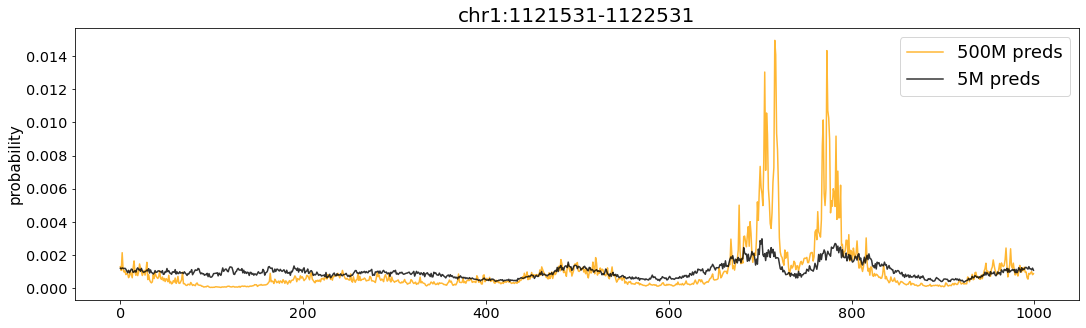

In [40]:
index=110
plt.figure()
plt.rcParams["figure.figsize"] = (18, 5) # (w, h)
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':20,
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
#plt.plot(labels_0_5M[index,:]/sum(labels_0_5M[index,:]), label="Observed profile probability", alpha=0.8)
plt.plot(sub_500M_softmax[index,:], label="500M preds", alpha=0.8, color="orange")
#plt.plot(sub_100M_softmax[index,:], label="100M preds", alpha=0.8, color="black")
#plt.plot(sub_25M_softmax[index,:], label="25M preds", alpha=0.8, color="black")
plt.plot(sub_5M_softmax[index,:], label="5M preds", alpha=0.8, color="black")

plt.ylabel('probability',fontsize = 15) #xlabel
plt.title(coord_fixed[index][0]+":"+str(int(coord_fixed[index][1])-500)+"-"+str(int(coord_fixed[index][1])+500))
#plt.xlabel('500 base-pair flanks around summit', fontsize = 15)#ylabel
plt.legend(fontsize=18)
#plt.ylim((0.00,0.05))
plt.show()


